# Explore here

In [53]:
#Paso 1: Carga del conjunto de datos
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")


In [54]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
df.drop(["HouseAge","AveBedrms","AveRooms","Population","AveOccup","MedHouseVal"],inplace=True, axis=1)

In [56]:
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [57]:
from sklearn.model_selection import train_test_split

X = df

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [58]:
#Paso 2: Construye un K-Means

from sklearn.cluster import KMeans

# Entrenar el modelo

model = KMeans(n_clusters = 6, random_state = 42)

model.fit(X_train)



KMeans(n_clusters=6, random_state=42)

In [59]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [60]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

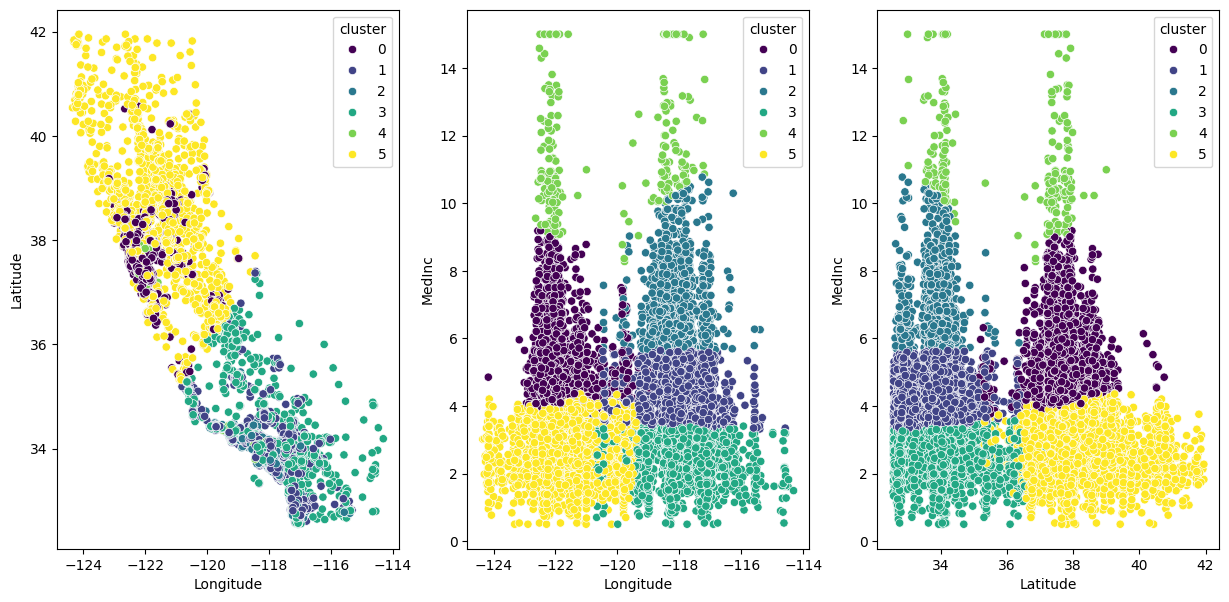

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.scatterplot(ax = axis[0], data = X_train, x = "Longitude", y = "Latitude",hue='cluster', palette = "viridis")
sns.scatterplot(ax = axis[1], data = X_train, x = 'Longitude', y = "MedInc",hue='cluster',  palette = "viridis")
sns.scatterplot(ax = axis[2], data = X_train, x = 'Latitude', y = "MedInc",hue='cluster',  palette = "viridis")
plt.show()

In [62]:
#Paso 3: Predice con el conjunto de test

y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


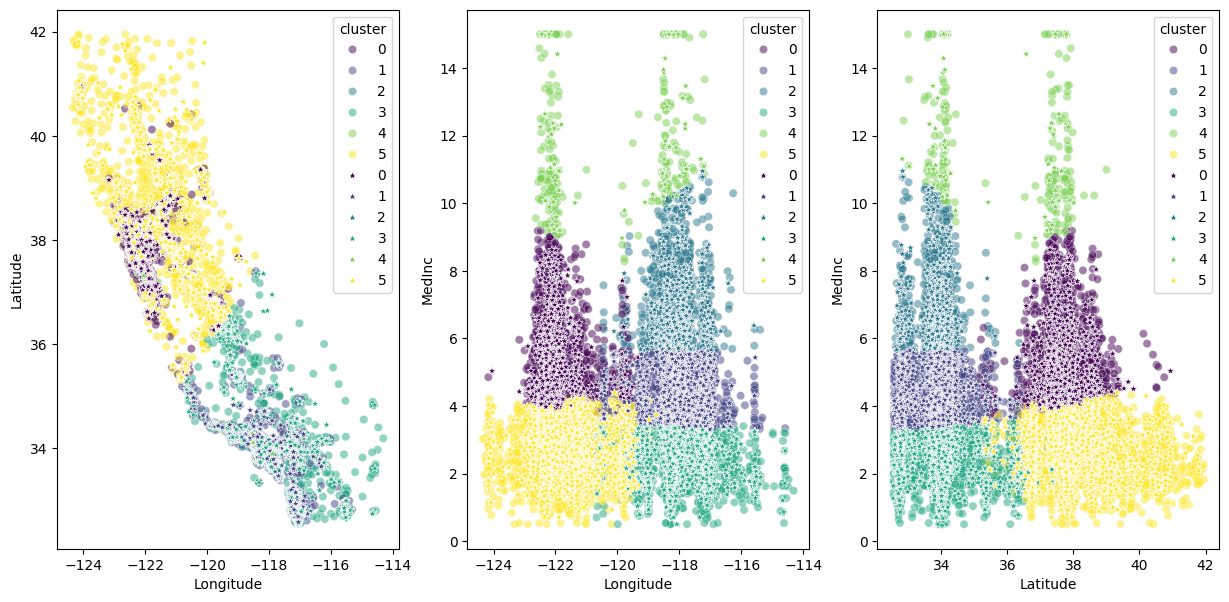

In [63]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))

#Original
sns.scatterplot(ax = axis[0], data = X_train, x = "Longitude", y = "Latitude",hue='cluster', palette = "viridis",alpha=0.5)
sns.scatterplot(ax = axis[1], data = X_train, x = 'Longitude', y = "MedInc",hue='cluster',  palette = "viridis",alpha=0.5)
sns.scatterplot(ax = axis[2], data = X_train, x = 'Latitude', y = "MedInc",hue='cluster',  palette = "viridis",alpha=0.5)

#Prediccion
sns.scatterplot(ax = axis[0], data = X_test, x = "Longitude", y = "Latitude",hue='cluster', palette = "viridis",marker="*")
sns.scatterplot(ax = axis[1], data = X_test, x = 'Longitude', y = "MedInc",hue='cluster',  palette = "viridis",marker="*")
sns.scatterplot(ax = axis[2], data = X_test, x = 'Latitude', y = "MedInc",hue='cluster',  palette = "viridis",marker="*")



plt.show()

In [64]:
#Paso 4: Entrena un modelo de clasificación supervisada

from sklearn.neighbors import KNeighborsClassifier

model_sup = KNeighborsClassifier()
model_sup.fit(X_train, y_train)


KNeighborsClassifier()

In [65]:
y_pred = model_sup.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [66]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [68]:
#Guardo los modelos
import pickle

pickle.dump(model, open("../models/kmeans_6c_42.sav", "wb"))
pickle.dump(model_sup, open("../models/knn_classifier.sav", "wb"))
